<a href="https://colab.research.google.com/github/MoneerahAlboulayan/info5731/blob/master/Alboulayan_selfstudy5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Grus:Chapter20
##Word Clouds
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
 ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
 ("data science", 60, 70), ("analytics", 90, 3),
 ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
 ("actionable insights", 40, 30), ("think out of the box", 45, 10),
 ("self-starter", 30, 50), ("customer focus", 65, 15),
 ("thought leadership", 35, 35)]

data

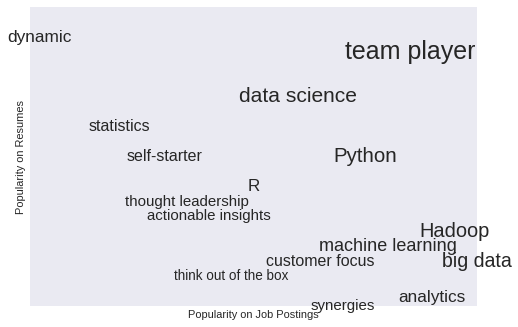

In [3]:
import matplotlib.pyplot as plt
def text_size(total):
  return 8 + total / 200 * 20

for word, job_popularity, resume_popularity in data:
  plt.text(job_popularity, resume_popularity, word,
           ha='center', va='center',
           size=text_size(job_popularity + resume_popularity))

plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
##n-gram Models
def fix_unicode(text):
  return text.replace(u"\u2019", "'")

In [0]:
from bs4 import BeautifulSoup
import requests
url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

content = soup.find("div", "entry-content") 
regex = r"[\w']+|[\.]" 

document = []

for paragraph in content('p'):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)

In [0]:
import collections
bigrams = zip(document, document[1:])
transitions = collections.defaultdict(list)
for prev, current in bigrams:
  transitions[prev].append(current)

In [0]:
import random
def generate_using_bigrams():
  current = "." # this means the next word will start a sentence
  result = []
  while True:
    next_word_candidates = transitions[current] # bigrams (current, _)
    current = random.choice(next_word_candidates) # choose one at random
    result.append(current) # append it to results
    if current == ".": return " ".join(result) 

In [0]:
trigrams = zip(document, document[1:], document[2:])
trigram_transitions = collections.defaultdict(list)
starts = []

for prev, current, next in trigrams:
  if prev == ".": # if the previous "word" was a period
    starts.append(current) # then this is a start word
    
  trigram_transitions[(prev, current)].append(next)

In [0]:
def generate_using_trigrams():
  current = random.choice(starts) # choose a random starting word
  prev = "." # and precede it with a '.'
  result = [current]
  while True:
    next_word_candidates = trigram_transitions[(prev, current)]
    next_word = random.choice(next_word_candidates)

    prev, current = current, next_word
    result.append(current)
    
    if current == ".":
      return " ".join(result)

In [0]:
##Grammars
grammar = {
 "_S" : ["_NP _VP"],
 "_NP" : ["_N",
 "_A _NP _P _A _N"],
 "_VP" : ["_V",
 "_V _NP"],
 "_N" : ["data science", "Python", "regression"],
 "_A" : ["big", "linear", "logistic"],
 "_P" : ["about", "near"],
 "_V" : ["learns", "trains", "tests", "is"]
}

In [0]:
def is_terminal(token):
  return token[0] != "_"

In [0]:
def expand(grammar, tokens):
  for i, token in enumerate(tokens):
    if is_terminal(token): continue
   
    replacement = random.choice(grammar[token])
    
    if is_terminal(replacement):
      tokens[i] = replacement
    else:
      tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
      
    return expand(grammar, tokens)

  return tokens

In [0]:
def generate_sentence(grammar):
  return expand(grammar, ["_S"])

In [23]:
##An Aside: Gibbs Sampling
import random
random.random()

0.8525600287673365

In [24]:
from scipy.stats import norm
norm.cdf(random.random())

0.5370277435192315

In [0]:
def roll_a_die():
  return random.choice([1,2,3,4,5,6])
def direct_sample():
  d1 = roll_a_die()
  d2 = roll_a_die()
  return d1, d1 + d2

In [0]:
def random_y_given_x(x):
 """equally likely to be x + 1, x + 2, ... , x + 6"""
 return x + roll_a_die()

In [27]:
x=3
random_y_given_x(x)

8

In [0]:
def random_x_given_y(y):
  if y <= 7:
    return random.randrange(1, y)
  else:
    return random.randrange(y - 6, 7)

In [29]:
y= 3
random_x_given_y(y)

1

In [0]:
def gibbs_sample(num_iters=100):
  x, y = 1, 2 # doesn't really matter
  for _ in range(num_iters):
    x = random_x_given_y(y)
    y = random_y_given_x(x)
  return x, y

In [31]:
gibbs_sample(num_iters=100)

(6, 12)

In [0]:
def compare_distributions(num_samples=1000):
  counts = collections.defaultdict(lambda: [0, 0])
  for _ in range(num_samples):
    counts[gibbs_sample()][0] += 1
    counts[direct_sample()][1] += 1
  return counts

In [33]:
compare_distributions(num_samples=1000)

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>>,
            {(1, 2): [40, 31],
             (1, 3): [34, 30],
             (1, 4): [32, 31],
             (1, 5): [28, 29],
             (1, 6): [35, 24],
             (1, 7): [30, 23],
             (2, 3): [28, 23],
             (2, 4): [33, 27],
             (2, 5): [26, 19],
             (2, 6): [28, 24],
             (2, 7): [28, 30],
             (2, 8): [19, 35],
             (3, 4): [26, 33],
             (3, 5): [31, 36],
             (3, 6): [17, 23],
             (3, 7): [25, 37],
             (3, 8): [31, 27],
             (3, 9): [35, 32],
             (4, 5): [28, 34],
             (4, 6): [29, 35],
             (4, 7): [29, 26],
             (4, 8): [20, 27],
             (4, 9): [26, 30],
             (4, 10): [30, 22],
             (5, 6): [23, 30],
             (5, 7): [34, 34],
             (5, 8): [21, 28],
             (5, 9): [33, 23],
             (5, 10): [16, 19],
             (5, 11): [33,

In [0]:
##Topic Modeling
def sample_from(weights):
  total = sum(weights)
  rnd = total * random.random() # uniform between 0 and total
  for i, w in enumerate(weights):
    rnd -= w # return the smallest i such that
    if rnd <= 0: return i # weights[0] + ... + weights[i] >= rnd

In [0]:
documents = [
 ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
 ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
 ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
 ["R", "Python", "statistics", "regression", "probability"],
 ["machine learning", "regression", "decision trees", "libsvm"],
 ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
 ["statistics", "probability", "mathematics", "theory"],
 ["machine learning", "scikit-learn", "Mahout", "neural networks"],
 ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
 ["Hadoop", "Java", "MapReduce", "Big Data"],
 ["statistics", "R", "statsmodels"],
 ["C++", "deep learning", "artificial intelligence", "probability"],
 ["pandas", "R", "Python"],
 ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
 ["libsvm", "regression", "support vector machines"]
]
K = 4 

In [42]:
import collections
document_topic_counts = [collections.Counter() for _ in documents]

document_topic_counts

[Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter()]

In [43]:
document_topic_counts = [collections.Counter() for _ in documents]

document_topic_counts

[Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter()]

In [44]:
topic_word_counts = [collections.Counter() for _ in range(K)]

topic_word_counts

[Counter(), Counter(), Counter(), Counter()]

In [45]:
topic_counts = [0 for _ in range(K)]

topic_counts

[0, 0, 0, 0]

In [46]:
document_lengths = map(len, documents)

document_lengths

In [47]:
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

distinct_words

{'Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory'}

In [48]:
D = len(documents)

D

15

In [49]:
document_topic_counts[3][1]

0

In [50]:
topic_word_counts[2]["nlp"]

0

In [0]:
def p_topic_given_document(topic, d, alpha=0.1):
  return ((document_topic_counts[d][topic] + alpha) /
          (document_lengths[d] + K * alpha))


In [0]:
def p_word_given_topic(word, topic, beta=0.1):
  return ((topic_word_counts[topic][word] + beta) /
          (topic_counts[topic] + W * beta))

In [0]:
def topic_weight(d, word, k):
   return p_word_given_topic(word, k) * p_topic_given_document(k, d)

In [0]:
def choose_new_topic(d, word):
  return sample_from([topic_weight(d, word, k)
                      for k in range(K)])

In [0]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]
for d in range(D):
  for word, topic in zip(documents[d], document_topics[d]):
    document_topic_counts[d][topic] += 1
    topic_word_counts[topic][word] += 1
    topic_counts[topic] += 1

In [0]:

for iter in range(1000):
  for d in range(D):
    for i, (word, topic) in enumerate(zip(documents[d],
                                          document_topics[d])):
      document_topic_counts[d][topic] -= 1
      topic_word_counts[topic][word] -= 1
      topic_counts[topic] -= 1
      document_lengths[d] -= 1
      
      new_topic = choose_new_topic(d, word)
      document_topics[d][i] = new_topic
      
      document_topic_counts[d][new_topic] += 1
      topic_word_counts[new_topic][word] += 1
      topic_counts[new_topic] += 1
      document_lengths[d] += 1

In [61]:
for k, word_counts in enumerate(topic_word_counts):
  for word, count in word_counts.most_common():
    if count > 0: print (k, word, count)

0 scikit-learn 2
0 pandas 2
0 HBase 1
0 R 1
0 regression 1
0 Java 1
0 C++ 1
0 Haskell 1
0 statistics 1
0 artificial intelligence 1
0 Hadoop 1
0 Big Data 1
0 statsmodels 1
0 libsvm 1
1 neural networks 2
1 deep learning 2
1 Cassandra 1
1 HBase 1
1 Python 1
1 numpy 1
1 decision trees 1
1 theory 1
1 Mahout 1
1 databases 1
1 Postgres 1
1 MySQL 1
1 MongoDB 1
2 Java 2
2 Python 2
2 regression 2
2 R 2
2 Cassandra 1
2 MongoDB 1
2 Postgres 1
2 scipy 1
2 statsmodels 1
2 probability 1
2 mathematics 1
2 machine learning 1
2 statistics 1
2 C++ 1
2 artificial intelligence 1
2 HBase 1
3 Big Data 2
3 probability 2
3 Spark 1
3 Storm 1
3 NoSQL 1
3 statistics 1
3 machine learning 1
3 libsvm 1
3 Python 1
3 programming languages 1
3 MapReduce 1
3 R 1
3 support vector machines 1


In [0]:
topic_names = ["Big Data and programming languages",
               "Python and statistics",
               "databases",
               "machine learning"]

In [63]:
for document, topic_counts in zip(documents, document_topic_counts):
  print (document)
  for topic, count in topic_counts.most_common():
    if count > 0:
      print (topic_names[topic], count, end="")
  print

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
machine learning 3databases 2Big Data and programming languages 1['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 2Python and statistics 2machine learning 1['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 2Big Data and programming languages 2databases 2['R', 'Python', 'statistics', 'regression', 'probability']
Big Data and programming languages 2databases 2machine learning 1['machine learning', 'regression', 'decision trees', 'libsvm']
machine learning 2databases 1Python and statistics 1['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
Big Data and programming languages 3machine learning 2databases 1['statistics', 'probability', 'mathematics', 'theory']
Big Data and programming languages 1machine learning 1databases 1Python and statistics 1['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
Python and statistics 2databases 1Big

In [64]:
#Bird:Chapter1
#Computing with Language: Texts and Words
1 + 5 * 2 - 3

8

In [0]:
###Getting Started with NLTK
import nltk

In [0]:
nltk.download('book')

In [75]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [76]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [77]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

In [0]:
###Searching Text

In [78]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [79]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [80]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [81]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


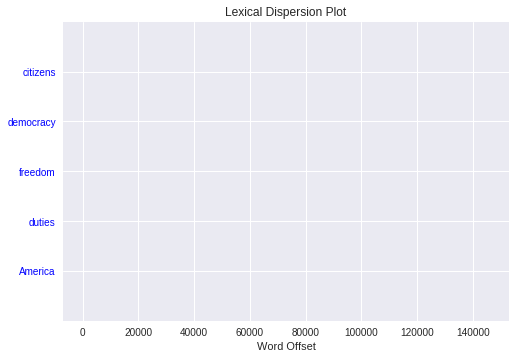

In [82]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [83]:
###Counting Vocabulary
len(text3)

44764

In [84]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [85]:
len(set(text3))

2789

In [86]:
len(set(text3)) / len(text3)

0.06230453042623537

In [87]:
text3.count("smote")

5

In [88]:
100 * text4.count('a') / len(text4)

1.4643016433938312

In [0]:
def lexical_diversity(text):
  return len(set(text)) / len(text)

In [0]:
def percentage(count, total):
  return 100 * count / total

In [94]:
lexical_diversity(text3)

0.06230453042623537

In [95]:
lexical_diversity(text5)

0.13477005109975562

In [96]:
percentage(4, 5)

80.0

In [97]:
percentage(text4.count('a'), len(text4))

1.4643016433938312

In [0]:
##A Closer Look at Python: Texts as Lists of Words
###Lists
sent1 = ['Call', 'me', 'Ishmael', '.']

In [99]:
sent1

['Call', 'me', 'Ishmael', '.']

In [100]:
len(sent1)

4

In [101]:
lexical_diversity(sent1)

1.0

In [102]:
from nltk.book import *
sent2

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [103]:
sent3

['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

In [104]:
['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail']

['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']

In [105]:
sent4 + sent1

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Call',
 'me',
 'Ishmael',
 '.']

In [0]:
 sent1.append("Some")

In [107]:
sent1

['Call', 'me', 'Ishmael', '.', 'Some']

In [109]:
###Indexing Lists
text4[173]

'awaken'

In [110]:
 text4.index('awaken')

173

In [111]:
text5[16715:16735]

['U86',
 'thats',
 'why',
 'something',
 'like',
 'gamefly',
 'is',
 'so',
 'good',
 'because',
 'you',
 'can',
 'actually',
 'play',
 'a',
 'full',
 'game',
 'without',
 'buying',
 'it']

In [112]:
text6[1600:1625]

['We',
 "'",
 're',
 'an',
 'anarcho',
 '-',
 'syndicalist',
 'commune',
 '.',
 'We',
 'take',
 'it',
 'in',
 'turns',
 'to',
 'act',
 'as',
 'a',
 'sort',
 'of',
 'executive',
 'officer',
 'for',
 'the',
 'week']

In [0]:
 sent = ['word1', 'word2', 'word3', 'word4', 'word5','word6', 'word7', 'word8', 'word9', 'word10']

In [114]:
sent[0]

'word1'

In [115]:
sent[9]

'word10'

In [116]:
sent[5:8]

['word6', 'word7', 'word8']

In [117]:
sent[5]

'word6'

In [118]:
sent[:3]

['word1', 'word2', 'word3']

In [119]:
text2[141525:]

['among',
 'the',
 'merits',
 'and',
 'the',
 'happiness',
 'of',
 'Elinor',
 'and',
 'Marianne',
 ',',
 'let',
 'it',
 'not',
 'be',
 'ranked',
 'as',
 'the',
 'least',
 'considerable',
 ',',
 'that',
 'though',
 'sisters',
 ',',
 'and',
 'living',
 'almost',
 'within',
 'sight',
 'of',
 'each',
 'other',
 ',',
 'they',
 'could',
 'live',
 'without',
 'disagreement',
 'between',
 'themselves',
 ',',
 'or',
 'producing',
 'coolness',
 'between',
 'their',
 'husbands',
 '.',
 'THE',
 'END']

In [120]:
sent[0] = 'First' [1]
sent[9] = 'Last'
len(sent)

10

In [0]:
sent[1:9] = ['Second', 'Third'] [2]

In [0]:
###Variables
sent1 = ['Call', 'me', 'Ishmael', '.']

In [0]:
my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode', 'forth', 'from', 'Camelot', '.']

In [0]:
noun_phrase = my_sent[1:4]

In [126]:
noun_phrase

['bold', 'Sir', 'Robin']

In [0]:
 wOrDs = sorted(noun_phrase)

In [128]:
wOrDs

['Robin', 'Sir', 'bold']

In [0]:
vocab = set(text1)

In [0]:
vocab_size = len(vocab)

In [131]:
 vocab_size

19317

In [0]:
###Strings
name = 'Monty'

In [133]:
name[0]

'M'

In [134]:
name[:4]

'Mont'

In [135]:
name * 2

'MontyMonty'

In [136]:
 name + '!'

'Monty!'

In [137]:
' '.join(['Monty', 'Python'])

'Monty Python'

In [138]:
'Monty Python'.split()

['Monty', 'Python']

In [0]:
##Computing with Language: Simple Statistics
saying = ['After', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said', 'than', 'done']

In [0]:
tokens = set(saying)

In [0]:
tokens = sorted(tokens)

In [142]:
tokens[-2:]

['said', 'than']

In [143]:
###Frequency Distributions
from nltk.corpus import brown
from nltk import FreqDist
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [144]:
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [145]:
 fdist1['whale']

906

In [146]:
###Fine-grained Selection of Words
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [147]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

In [148]:
###Collocations and Bigrams
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [149]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [150]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


In [151]:
###Counting Other Things
[len(w) for w in text1]

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [152]:
fdist = FreqDist(len(w) for w in text1)
print(fdist) 

<FreqDist with 19 samples and 260819 outcomes>


In [153]:
fdist

FreqDist({1: 47933,
          2: 38513,
          3: 50223,
          4: 42345,
          5: 26597,
          6: 17111,
          7: 14399,
          8: 9966,
          9: 6428,
          10: 3528,
          11: 1873,
          12: 1053,
          13: 567,
          14: 177,
          15: 70,
          16: 22,
          17: 12,
          18: 1,
          20: 1})

In [154]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [155]:
fdist.max()

3

In [156]:
fdist[3]

50223

In [157]:
fdist.freq(3)

0.19255882431878046

In [158]:
##Back to Python: Making Decisions and Taking Control
###Conditionals
from nltk.book import *
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [159]:
[w for w in sent7 if len(w) < 4]

[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']

In [160]:
[w for w in sent7 if len(w) <= 4]

[',', '61', 'old', ',', 'will', 'join', 'the', 'as', 'a', 'Nov.', '29', '.']

In [161]:
[w for w in sent7 if len(w) == 4]

['will', 'join', 'Nov.']

In [162]:
[w for w in sent7 if len(w) != 4]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 '29',
 '.']

In [163]:
sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [164]:
sorted(term for term in set(text4) if 'gnt' in term)

['Sovereignty', 'sovereignties', 'sovereignty']

In [165]:
sorted(item for item in set(text6) if item.istitle())

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African',
 'Ages',
 'Aggh',
 'Agh',
 'Ah',
 'Ahh',
 'Alice',
 'All',
 'Allo',
 'Almighty',
 'Alright',
 'Am',
 'Amen',
 'An',
 'Anarcho',
 'And',
 'Angnor',
 'Anthrax',
 'Antioch',
 'Anybody',
 'Anyway',
 'Apples',
 'Aramaic',
 'Are',
 'Arimathea',
 'Armaments',
 'Arthur',
 'As',
 'Ask',
 'Assyria',
 'At',
 'Attila',
 'Augh',
 'Autumn',
 'Auuuuuuuugh',
 'Away',
 'Ay',
 'Ayy',
 'B',
 'Back',
 'Bad',
 'Badon',
 'Battle',
 'Be',
 'Beast',
 'Bedevere',
 'Bedwere',
 'Behold',
 'Between',
 'Beyond',
 'Black',
 'Bloody',
 'Blue',
 'Bon',
 'Bones',
 'Book',
 'Bors',
 'Brave',
 'Bravely',
 'Bravest',
 'Bread',
 'Bridge',
 'Bring',
 'Bristol',
 'Britain',
 'Britons',
 'Brother',
 'Build',
 'Burn',
 'But',
 'By',
 'C',
 'Caerbannog',
 'Camaaaaaargue',
 'Camelot',
 'Castle',
 'Chap

In [166]:
sorted(item for item in set(sent7) if item.isdigit())

['29', '61']

In [167]:
sorted(w for w in set(text7) if '-' in w and 'index' in w)
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)
sorted(w for w in set(sent7) if not w.islower())
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

In [168]:
[len(w) for w in text1]

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [169]:
[w.upper() for w in text1]

['[',
 'MOBY',
 'DICK',
 'BY',
 'HERMAN',
 'MELVILLE',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'SUPPLIED',
 'BY',
 'A',
 'LATE',
 'CONSUMPTIVE',
 'USHER',
 'TO',
 'A',
 'GRAMMAR',
 'SCHOOL',
 ')',
 'THE',
 'PALE',
 'USHER',
 '--',
 'THREADBARE',
 'IN',
 'COAT',
 ',',
 'HEART',
 ',',
 'BODY',
 ',',
 'AND',
 'BRAIN',
 ';',
 'I',
 'SEE',
 'HIM',
 'NOW',
 '.',
 'HE',
 'WAS',
 'EVER',
 'DUSTING',
 'HIS',
 'OLD',
 'LEXICONS',
 'AND',
 'GRAMMARS',
 ',',
 'WITH',
 'A',
 'QUEER',
 'HANDKERCHIEF',
 ',',
 'MOCKINGLY',
 'EMBELLISHED',
 'WITH',
 'ALL',
 'THE',
 'GAY',
 'FLAGS',
 'OF',
 'ALL',
 'THE',
 'KNOWN',
 'NATIONS',
 'OF',
 'THE',
 'WORLD',
 '.',
 'HE',
 'LOVED',
 'TO',
 'DUST',
 'HIS',
 'OLD',
 'GRAMMARS',
 ';',
 'IT',
 'SOMEHOW',
 'MILDLY',
 'REMINDED',
 'HIM',
 'OF',
 'HIS',
 'MORTALITY',
 '.',
 '"',
 'WHILE',
 'YOU',
 'TAKE',
 'IN',
 'HAND',
 'TO',
 'SCHOOL',
 'OTHERS',
 ',',
 'AND',
 'TO',
 'TEACH',
 'THEM',
 'BY',
 'WHAT',
 'NAME',
 'A',
 'WHALE',
 '-',
 'FISH',
 'IS',
 'TO',
 'BE',
 

In [170]:
len(text1)

260819

In [171]:
len(set(text1))

19317

In [172]:
len(set(word.lower() for word in text1))

17231

In [173]:
len(set(word.lower() for word in text1 if word.isalpha()))

16948

In [174]:
###Nested Code Blocks
word = 'cat'
if len(word) < 5:
  print('word length is less than 5')

word length is less than 5


In [0]:
if len(word) >= 5:
  print('word length is greater than or equal to 5')

In [176]:
for word in ['Call', 'me', 'Ishmael', '.']:
  print(word)

Call
me
Ishmael
.


In [178]:
###Looping with Conditions
sent1 = ['Call', 'me', 'Ishmael', '.']
for xyzzy in sent1:
  if xyzzy.endswith('l'):
    print(xyzzy)

Call
Ishmael


In [179]:
for token in sent1:
  if token.islower():
    print(token, 'is a lowercase word')
  elif token.istitle():
    print(token, 'is a titlecase word')
  else:
    print(token, 'is punctuation')

Call is a titlecase word
me is a lowercase word
Ishmael is a titlecase word
. is punctuation


In [180]:
tricky = sorted(w for w in set(text2) if 'cie' in w or 'cei' in w)
for word in tricky:
  print(word, end=' ')

ancient ceiling conceit conceited conceive conscience conscientious conscientiously deceitful deceive deceived deceiving deficiencies deficiency deficient delicacies excellencies fancied insufficiency insufficient legacies perceive perceived perceiving prescience prophecies receipt receive received receiving society species sufficient sufficiently undeceive undeceiving 

In [0]:
#End